# Prompt Engineering : few-shot prompting 

    
    LLM은 뛰어난 zero-shot 성능을 보여주지만 복잡한 작업에는 여전히 미치지 못합니다. 
    few-shot prompting는 상황 내 학습을 가능하게 하는 기술로, 여기서 모델을 더 나은 성능으로 제어하기 위한 프롬프트에서 시연을 제공합니다.
    시연은 모델이 응답을 생성하기를 원하는 후속 예를 위한 조건으로 사용됩니다

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message["content"]


## ► few_shot_prompting examples

## [1] 

    예시에서 과제는 문장에서 새로운 단어를 올바르게 사용하는 것입니다. (gpt-3.5-turbo를 사용하였음) 

In [3]:
prompt= """
        A "whatpu" is a small, furry animal native to Tanzania.
        An example of a sentence that uses
        the word whatpu is:
        We were traveling in Africa and we saw these very cute whatpus.
        To do a "farduddle" means to jump up and down really fast.
        An example of a sentence that uses
        the word farduddle is:
"""

print(get_completion(prompt))

The children were so excited that they started to farduddle when they heard the ice cream truck approaching.


    여기서는 모델이 단 하나의 예(예: 1-shot)만 제공함으로써 어떻게든 작업을 수행하는 방법을 배웠다는 것을 관찰할 수 있습니다.
    더 어려운 작업의 경우 시연(예: 3-shot, 5-shot, 10-shot 등)을 늘리는 실험을 할 수 있습니다. 

# [2] 

In [6]:
prompt= """
        This is awesome! // Negative
        This is bad! // Positive
        Wow that movie was rad! // Positive
        What a horrible show! //
"""


print(get_completion(prompt))

Negative


    위 [2]의 예제에서는 label이 무작위로 추출되었음에도 불구하고 여전히 정답을 알아냅니다.
    위에서 예제는 형식을 유지하고 있고, 이것은 원하는 답을 얻기 위한 좋은 방법입니다.
    아래의 추가적인 프롬프트 실험을 보면, 새로운 GPT 모델은 무작위 형식에서도 더 강건해지고 있다.

# [3]

In [7]:
prompt= """
        Positive This is awesome! 
        This is bad! Negative
        Wow that movie was rad!
        Positive
        What a horrible show! --
"""


print(get_completion(prompt))

Negative


    위 [3]의 프롬프트 형식에 일관성이 없지만 모델은 여전히 정확한 label을 예측하고 있다.
    여기서 우리는 다양한 종류의 프롬프트를 포함하여 다양하고 복잡한 작업에 적용되는지 확인하기 위해 더 철저한 분석을 수행해야할 필요가 있다. 

# Limitations of few_shot_prompting


    표준  few-shot prompt는 많은 작업에 효과가 있지만 더 복잡한 추론 작업을 다룰 때 완벽한 기법은 아닙니다.
    아래의 예시는 prompt guide에서 few-shot prompting의 한계를 위해 만들어놓았던 예시들이고 한계를 보여주기 위한 output들을 나열했습니다. 
    그러나, 제공된 아래의 프롬프트와 예시들은 현재 시점(2023.12.14) gpt-3-turbo에서는 few-shot prompting으로 완벽한 답을 구사합니다.

    prompt guide에서 few shot prompting의 limitation을 보여주기 위해 나열한 자료들

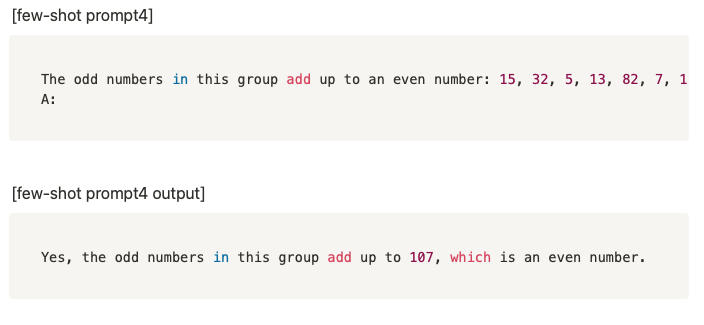

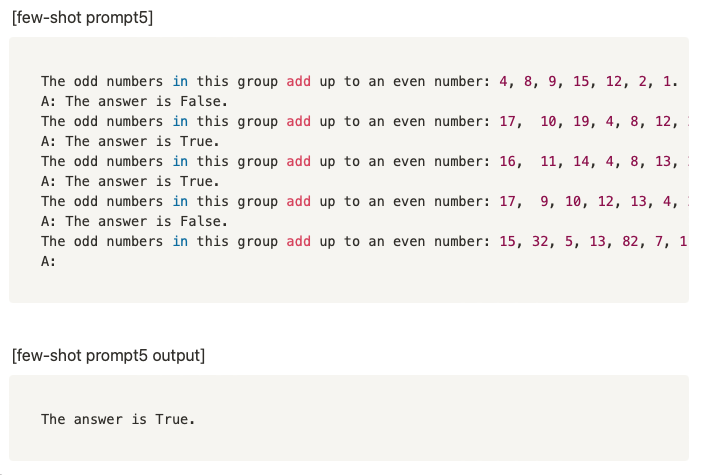

## ► Limitations of few_shot_prompting examples

# [1]

In [8]:
prompt= """
    The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
    A:
"""


print(get_completion(prompt))

To find the sum of the odd numbers in this group, we need to add up all the odd numbers: 15 + 5 + 13 + 7 + 1 = 41.

Therefore, the sum of the odd numbers in this group is 41, which is an odd number.


# [2]


In [9]:
prompt= """
        The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
        A: The answer is False.
        The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
        A: The answer is True.
        The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
        A: The answer is True.
        The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
        A: The answer is False.
        The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
        A:
"""


print(get_completion(prompt))

The answer is False.
